In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#making a dataframe for accident data from 2014 until 2023

ongevallen = "C:\\Users\\olede\\Documents\\Python\\Groepje9\\ongevallen.txt"
df_ong = pd.read_csv(ongevallen, delimiter=',', encoding='ISO-8859-1', low_memory=False)

In [3]:
#dividing the dataframe in two, one filtering for the 35 least urban municipalities and one filtering for the three most urban

rural_df = df_ong[df_ong['GME_NAAM'].isin([
    "Dinkelland", "Schouwen-Duiveland", "De Fryske Marren",
    "Tubbergen", "Hollands Kroon", "Hulst", "Opsterland",
    "Dronten", "Staphorst", "Bergen (L.)", "Bronckhorst",
    "Coevorden", "Noardeast-Fryslân", "Weststellingwerf",
    "Ooststellingwerf", "Alphen-Chaam", "De Wolden",
    "Noordoostpolder", "Ommen", "Het Hogeland",
    "Midden-Drenthe", "Zeewolde", "Westerwolde",
    "Borger-Odoorn", "Aa en Hunze", "Baarle-Nassau",
    "Noord-Beveland", "Texel", "Sluis", "Westerveld",
    "Ameland", "Rozendaal", "Terschelling", "Vlieland",
    "Schiermonnikoog"
])]

urban_df = df_ong[df_ong['GME_NAAM'].isin([
    "Leiden", "\'s-Gravenhage", "Haarlem"
])]


In [4]:
#filtering those 2 dataframes for maximum speeds 80 km/h and up, targeting highways 

filtered_rural_df = rural_df[rural_df['MAXSNELHD'] >= 80]
filtered_urban_df = urban_df[urban_df['MAXSNELHD'] >= 80]

#change type of damage to understandable terms
filtered_rural_df['AP3_CODE'] = filtered_rural_df['AP3_CODE'].replace({
    'DOD': 'Lethal',
    'UMS': 'Material Damage',
    'LET': 'Injury'
})

filtered_urban_df['AP3_CODE'] = filtered_urban_df['AP3_CODE'].replace({
    'DOD': 'Lethal',
    'UMS': 'Material Damage',
    'LET': 'Injury'
})

#printing csv files to check if the right data stayed in the file
filtered_rural_df.to_csv("C:\\Users\\olede\\Documents\\Python\\Groepje9\\ongevallen_rural.csv", index=False)
filtered_urban_df.to_csv("C:\\Users\\olede\\Documents\\Python\\Groepje9\\ongevallen_urban.csv", index=False)

C:\Users\olede\AppData\Local\Temp\ipykernel_17852\2336358552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rural_df['AP3_CODE'] = filtered_rural_df['AP3_CODE'].replace({
C:\Users\olede\AppData\Local\Temp\ipykernel_17852\2336358552.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_urban_df['AP3_CODE'] = filtered_urban_df['AP3_CODE'].replace({


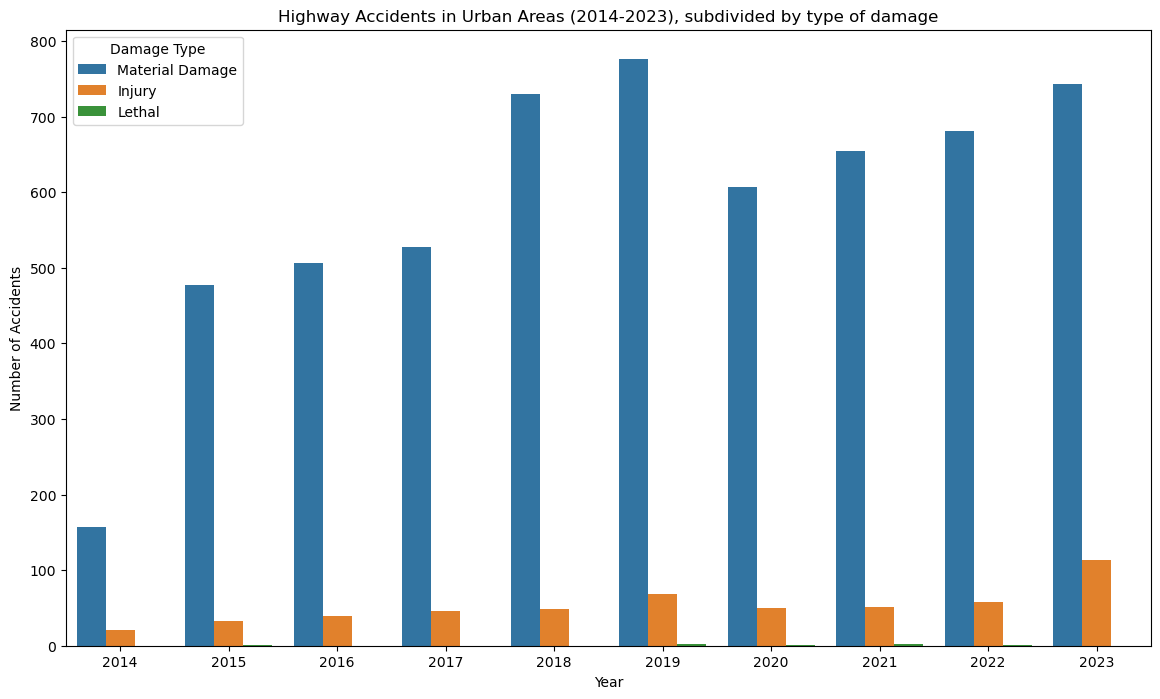

In [5]:
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_urban_df, x='JAAR_VKL', hue='AP3_CODE') #year on the x axis, hue is type of damage
plt.title('Highway Accidents in Urban Areas (2014-2023), subdivided by type of damage')
plt.ylabel('Number of Accidents')
plt.xlabel('Year')
plt.legend(title='Damage Type')
plt.show()

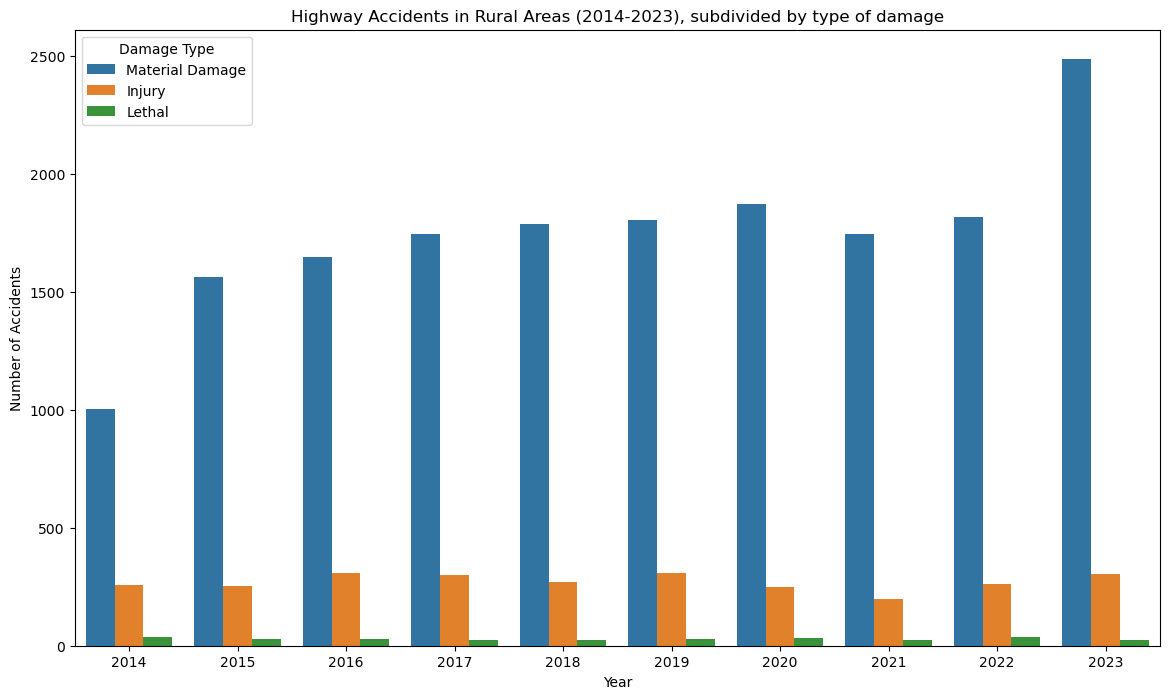

In [6]:
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_rural_df, x='JAAR_VKL', hue='AP3_CODE') #year on the x axis, hue is type of damage
plt.title('Highway Accidents in Rural Areas (2014-2023), subdivided by type of damage')
plt.ylabel('Number of Accidents')
plt.xlabel('Year')
plt.legend(title='Damage Type')
plt.show()

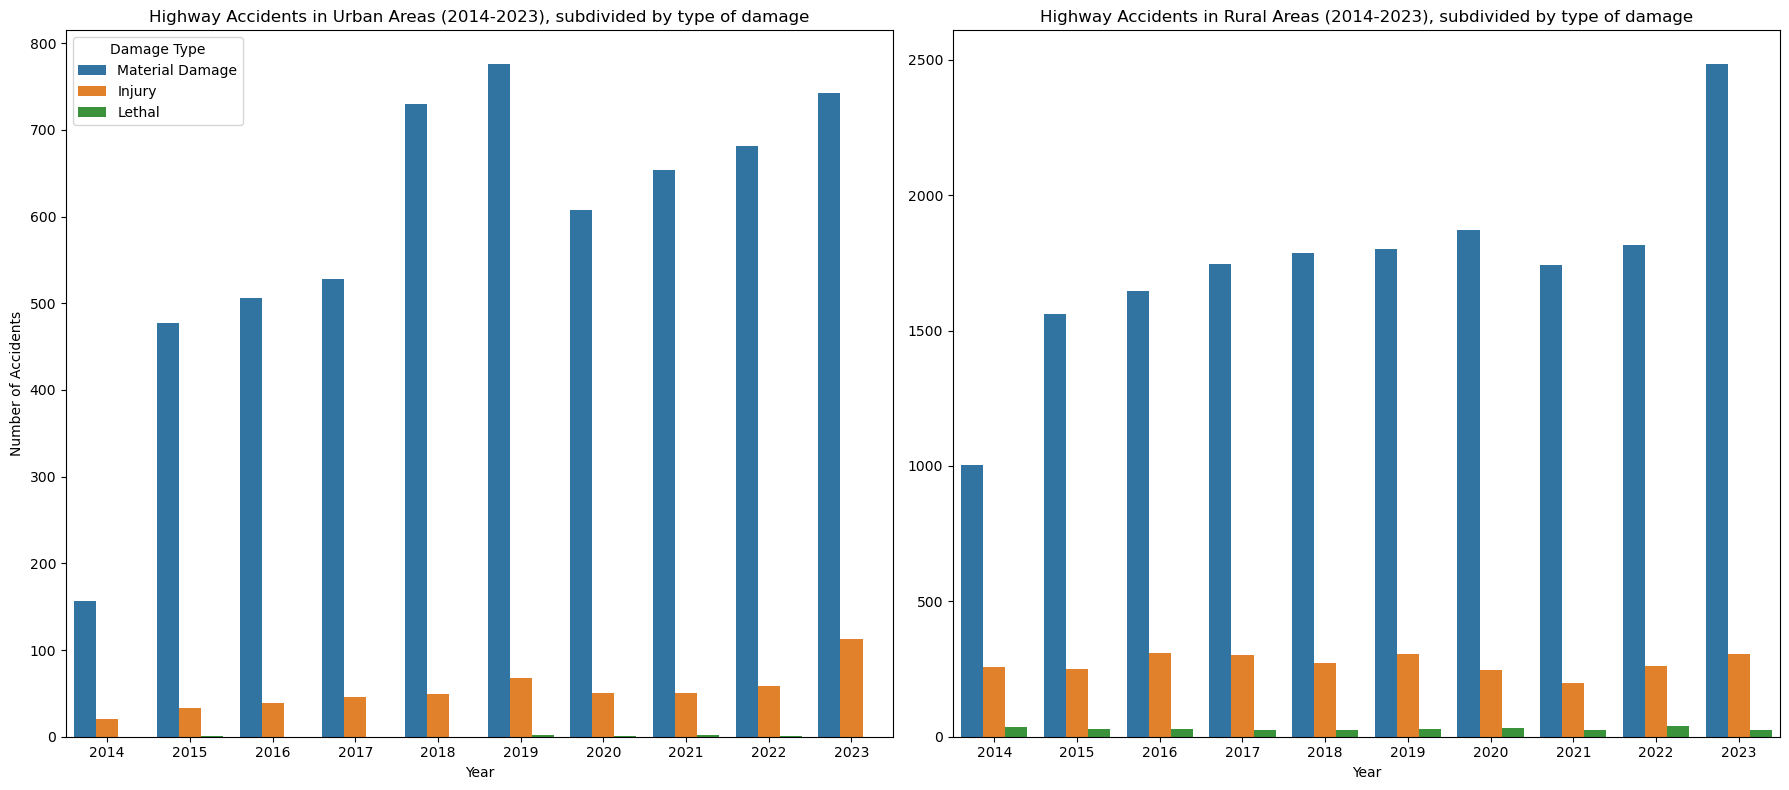

In [10]:
# Set up the figure with two subplots next to each other, to be able to see relative differences
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)  # sharey=False, different y-axis for relative measure

# First plot for urban areas
sns.countplot(data=filtered_urban_df, x='JAAR_VKL', hue='AP3_CODE', ax=axes[0])
axes[0].set_title('Highway Accidents in Urban Areas (2014-2023), subdivided by type of damage')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Accidents')
axes[0].legend(title='Damage Type')

# Second plot for rural areas
sns.countplot(data=filtered_rural_df, x='JAAR_VKL', hue='AP3_CODE', ax=axes[1])
axes[1].set_title('Highway Accidents in Rural Areas (2014-2023), subdivided by type of damage')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('')  # No y-axis label for the second plot 
axes[1].legend_.remove() # No second legend

plt.tight_layout()
plt.show()